# Dialysis capapcity model

The dialysis model runs through a defined period (e.g. one year) and simulates the progression of patients through phases of COVID infection: negative, positive (with some requiring inpatient care) and recovered or died. The speed of progression of infection through the population may be varied (typically 3-12 months).

As patients change COVID state the model seeks to place them in the appropriate unit and session, opening up COVID-positive sessions in units that allow it. COVID-positive patients do not mix with any other patients. Opening up COVID-positive sessions causes other patients to be displaced from that session, and the model seeks to reallocate them either to the same unit or, if there is no space left, to the closest alternative unit.

When allocating patients to units, the following search strategy is employed.

* *COVID negative*: First look for place in current unit attended. If no room there place in the closest unit (judged by estimated travel time) with available space.

* *COVID-positive*: Open up sessions in units for COVID positive patients in an order specified in the input files. If a new COVID session is required, the model will displace all COVID negative patients in that session, and seek to re-allocate them according to the rules for allocating COVID negative patients. COVID-positive sessions are converted back to COVID negative sessions when they are no longer needed.

* COVID-positive inpatient*: All inpatients are placed in Queen Alexandra Hospital, Portsmouth (though the model allows searching by travel time if another unit were to open to renal COVID-positive inpatients). If a new COVID session is required, the model will displace all COVID negative patients in that session, and seek to re-allocate them according to the rules for allocating COVID negative patients.

* *COVID-recovered*: Treat as COVID negative.

* *Unallocated patients*: If a patient cannot be allocated to any unit, the model attempts to allocate them each day.

Patients, in the model, may end up being cared for at a more distant unit than their starting unit. Once every week, the model seeks to reallocate patients back to their starting unit, or closest available unit if room in their starting unit is not available. This will also compress COVID-positive patients into as few units and sessions as possible.



## Input files

### Unit capacity and use

The input file *./sim/units.csv* allows definition and use of units:

* *unit*: the name used in outputs.
* *subunit*: units may be broken down into two or more subunits. This may be done, for example, if only a part of the unit will be made available to COVID-19 positive patients.
* *Chairs*: the number of dialysis chairs available in each session.
* *inpatient*: Set to 1 for hospitals that can accept COVID postive dialysis inpatients.
* *Allow cov +*: a value of 1 indicates that sessions for that unit, or subunit, may be made available to COVID positive patients.
* *Cov +ve order*: The order in which units open up for COVID positive dialysis out patients.
* *Mon_1 thru Tues_3*: Three sessions per day on Mon/Tues (which repeat on Wed/Thurs and Fri/Sat). A 1 indicates that the session is open for booking. 

### Patients

The input file *./sim/units.csv* contains information on patients:

* *Patient ID*: Any id of patient.
* *Patient type*: Not currently used in model.
* *Postcode sector*: Home postcode sector of patient.
* *Site*: Site patient currently attends.
* *Subunit*: Allocation of patient to subunit (if subunits use, you can simply assign them to any of them at the beginning of the model).
* *Site postcode*: Postcode of dialysis unit
* *COVID status*: Can be set to *positive* if patients known to be positive at the start of the model run.
* *first_day*: Either *Mon* or *Tues* for patients having dialysis Mon/Wed/Fri or Tues/Thurs/Sat.
* count*: set to 1 for all patients.

### Travel matrix

The input file *./sim/travel_matrix.csv* contains travel times (minutes) from all patient postcode sectors to all dialysis units. We used Routino (routino.org) to obtain travel times.

## Code and example

In [1]:
import sim_replicate as sim
from sim.parameters import Scenario, Uniform, Normal

Scenarios are defined in dictionaries as below. Multiple sceanrios may be defined and all results are saved to the *./output* folder. 

Parameters in the dictionary are:

* *run_length*: Model run in days.
* *total_proportion_people_infected*. The proportion of patients who may be infected in the model. We assume this will be limited by herd immunity (or a vaccine).
* *time_to_infection*: The time from start of model run to the time patients are infected. For time to infection a normal distrubtion is used. The paramters applied are mean, standard deviation, and lower cut-off (use 0 to avoid negative values) in days. In scarios we describe as 3 months we assume that six standard deviations of the distrubution (3 either side of the mean) occur in 3 months, or 90 days, so a standard deviation of 90/6 (or 15) is used.
* *time_positive*: The duration a patient is positive if they remain in outpatient dialysis. A uniform distribution is used.
* *proportion_pos_requiring_inpatient*: The poportion of infected patients who will require inpatient dialysis.
* *time_pos_before_inpatient*: For patients who will receive inpatient care, this is the time spent as a COVID positive outpatient before being hospitalised.  A uniform distribution is used.
* *time_inpatient*: The length of stay as an inpatient. A uniform distribution is used.
* *mortality*: The average mortality of dialysis patients who become infected with COVID. 
* *random_positive_rate_at_start*: The model allows a proportion of patients to be randomly infected at the start of the model run.

Define a sceanrio and the numebr of model runs below (the replicates will use all available CPU cores).

In [2]:
number_of_replications = 30
scenarios = {}
scenarios['base_3_month'] = Scenario(
    run_length=150,
    total_proportion_people_infected = 0.8,
    time_to_infection = Normal(60, 15, 0.0),
    time_positive = Uniform(7, 14),
    proportion_pos_requiring_inpatient= 0.6,
    time_pos_before_inpatient = Uniform(3,7),
    time_inpatient = Uniform(7.0, 14.0),
    mortality = 0.15,
    random_positive_rate_at_start = 0.0
    )

Run the scenario. Three sets of charts will be outputed for each scenario (and saved with sceanrio names in the *./output* directory:
* Numbers of patients in negative, positive outpatient, positive inpatient, recovered/died stages of COVID:
* Number of patients displaced from their starting dialysis unit, and how much extra travel time there is to their unit of current care.
* Numbers of patients (negative/recovered, positive outpatient, pisitive inpatient) at each dialysis unit.

Running 30 reps of base_3_month => 

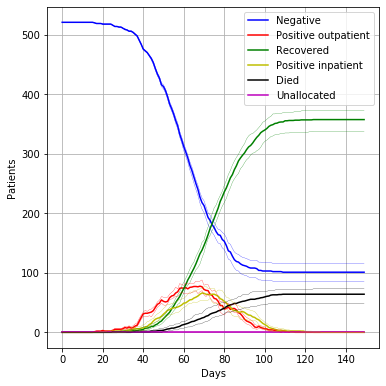

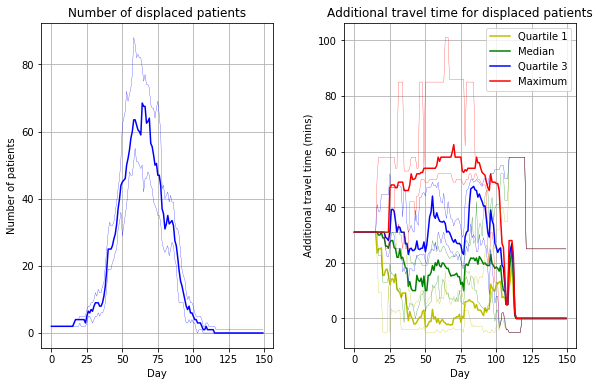

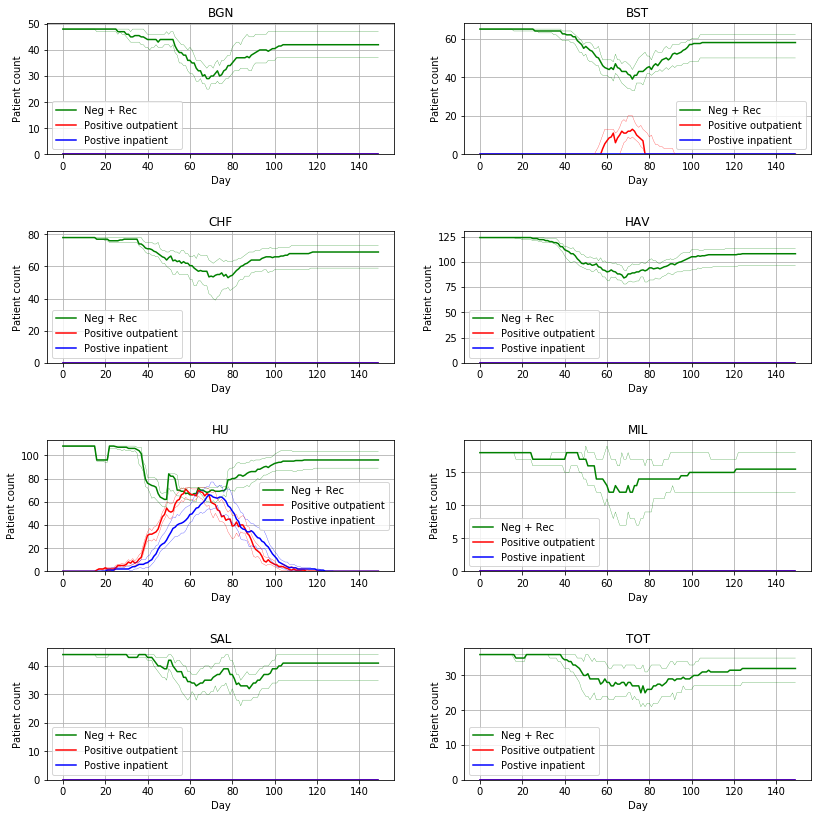

Done.


In [3]:
sim.run_replications(scenarios, number_of_replications)